# 1) Carga y exploración inicial

Importaremos el csv y se analizará su estructura principal para identificar valores nulos, duplicados y rangos atípicos

In [ ]:
import pandas as pd
ruta = r"...dataset_movilidad_urbana.csv"
df = pd.read_csv(ruta)

print(df.head())  # muestra las primeras filas

                     fecha_hora    parada  num_pasajeros  tiempo_espera  \
0  2024-03-11 00:00:00 19:00:00  Parada_8            6.0            9.5   
1  2024-03-14 00:00:00 02:30:00  Parada_4            7.0           10.2   
2  2024-03-27 00:00:00 01:30:00  Parada_4            6.0            5.1   
3  2024-03-21 00:00:00 06:30:00  Parada_8            7.0            1.8   
4  2024-03-23 00:00:00 23:00:00  Parada_7            7.0            4.9   

  evento_climatico  
0          soleado  
1          soleado  
2         tormenta  
3         tormenta  
4         tormenta  


In [ ]:
print(df.info())  # resumen del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha_hora        510 non-null    object 
 1   parada            510 non-null    object 
 2   num_pasajeros     485 non-null    float64
 3   tiempo_espera     485 non-null    float64
 4   evento_climatico  510 non-null    object 
dtypes: float64(2), object(3)
memory usage: 20.1+ KB
None


En esta primera exploración podemos observar que contamos con 5 variables, dos de ellas numéricas y la fecha_hora aparece como object en vez de como datetime, por lo que requerirá de conversión. Además, podemos observar que en las columnas número de pasajeros y tiempo de espera tenemos nulos, ya que sólo tenemos 485 no nulos de 510 registros totales.

In [ ]:
print(df.describe(include='all')) # estadisticas descriptivas

                          fecha_hora    parada  num_pasajeros  tiempo_espera  \
count                            510       510     485.000000     485.000000   
unique                           421        10            NaN            NaN   
top     2024-03-27 00:00:00 06:30:00  Parada_5            NaN            NaN   
freq                               3        67            NaN            NaN   
mean                             NaN       NaN       7.841237       5.966598   
std                              NaN       NaN       2.590022       2.915313   
min                              NaN       NaN       2.000000       0.100000   
25%                              NaN       NaN       6.000000       3.800000   
50%                              NaN       NaN       8.000000       6.000000   
75%                              NaN       NaN       9.000000       7.800000   
max                              NaN       NaN      16.000000      15.700000   

       evento_climatico  
count        

Utilizamos la función describe() para observar estadísticas descriptivas de las variables, siendo las variables numéricas las más interesantes de analizar.

En la variable num_pasajeros, se observa una media de 7,84 pasajeros, con un valor máximo de 16 pasajeros. Este máximo podría ser un outlier que indique situaciones puntuales de alta demanda en horas punta.

Respecto a la variable tiempo_espera, la media es de 5,97 minutos, mientras que el máximo de 15,7 minutos. Este valor también parece ser un outlier y podría deberse a una incidencia del servicio o factores externos como el clima.

En cuanto a la variable categórica evento_climatico, observamos que existen cuatro categorías distintas, siendo lluvia la más frecuente (moda), con 132 registros. Por tanto, una gran parte de los datos se han recogido bajo condiciones climáticas desfavorables, lo cual podría impactar en la demanda y tiempos de espera.

In [ ]:
print("Nulos por columna:\n", df.isna().sum()) # valores nulos

Nulos por columna:
 fecha_hora           0
parada               0
num_pasajeros       25
tiempo_espera       25
evento_climatico     0
dtype: int64


Utilizamos isna para confirmar la existencia de los 25 valores nulos tanto en número de pasajeros como en tiempo de espera. Esto afecta directamente a las métricas, por lo que deberán imputarse o eliminarse.

In [ ]:
df[df.isna().any(axis=1)] #filas con nulos

,fecha_hora,parada,num_pasajeros,tiempo_espera,evento_climatico
14,2024-03-18 00:00:00 19:30:00,Parada_1,NaN,7.5,soleado
18,2024-03-24 00:00:00 14:00:00,Parada_7,6.0,NaN,soleado
21,2024-03-12 00:00:00 17:00:00,Parada_9,NaN,4.9,nublado
22,2024-03-18 00:00:00 22:30:00,Parada_3,NaN,9.5,lluvia
29,2024-03-08 00:00:00 10:00:00,Parada_2,12.0,NaN,nublado
30,2024-03-13 00:00:00 15:30:00,Parada_10,NaN,7.5,soleado
31,2024-03-20 00:00:00 22:00:00,Parada_10,9.0,NaN,nublado
34,2024-03-27 00:00:00 14:30:00,Parada_7,NaN,11.1,soleado
45,2024-03-24 00:00:00 23:00:00,Parada_9,NaN,10.9,nublado
49,2024-03-29 00:00:00 16:30:00,Parada_6,6.0,NaN,soleado


In [ ]:
print("Duplicados:\n", df.duplicated().sum()) #duplicados

Duplicados:
 10


Lo siguiente que analizamos es la existencia de filas duplicados y deberemos quitar los duplicados que existan posteriormente.

In [ ]:
df[df.duplicated()] #filas duplicadas

,fecha_hora,parada,num_pasajeros,tiempo_espera,evento_climatico
500,2024-03-23 00:00:00 15:30:00,Parada_3,12.0,7.6,soleado
501,2024-03-11 00:00:00 06:00:00,Parada_5,11.0,7.1,tormenta
502,2024-03-20 00:00:00 22:00:00,Parada_9,7.0,6.4,tormenta
503,2024-03-14 00:00:00 04:30:00,Parada_7,10.0,8.5,lluvia
504,2024-03-01 00:00:00 21:00:00,Parada_3,8.0,6.8,tormenta
505,2024-03-16 00:00:00 22:30:00,Parada_3,11.0,6.5,soleado
506,2024-03-08 00:00:00 19:30:00,Parada_8,7.0,9.4,lluvia
507,2024-03-23 00:00:00 12:30:00,Parada_2,10.0,0.3,lluvia
508,2024-03-05 00:00:00 11:30:00,Parada_8,8.0,0.3,soleado
509,2024-03-08 00:00:00 06:30:00,Parada_5,6.0,9.1,soleado


In [ ]:
df.select_dtypes(include="number") #valores atipicos

,num_pasajeros,tiempo_espera
0,6.0,9.5
1,7.0,10.2
2,6.0,5.1
3,7.0,1.8
4,7.0,4.9
...,...,...
505,11.0,6.5
506,7.0,9.4
507,10.0,0.3
508,8.0,0.3


Por último, exploramos la existencia o no de outliers, tanto de forma estadística como de forma gráfica mediante un boxplot.

In [ ]:
# deteccion de outliers. esta formula sirve para contar cuántos valores atípicos hay:
Q1 = df['tiempo_espera'].quantile(0.25)
Q3 = df['tiempo_espera'].quantile(0.75)
IQR = Q3 - Q1

outliers_tiempo = df[
    (df['tiempo_espera'] < Q1 - 1.5 * IQR) |
    (df['tiempo_espera'] > Q3 + 1.5 * IQR)
]

outliers_tiempo.shape[0]

1

In [ ]:
Q1 = df['num_pasajeros'].quantile(0.25)
Q3 = df['num_pasajeros'].quantile(0.75)
IQR = Q3 - Q1

outliers_tiempo = df[
    (df['num_pasajeros'] < Q1 - 1.5 * IQR) |
    (df['num_pasajeros'] > Q3 + 1.5 * IQR)
]

outliers_tiempo.shape[0]

7

Podemos observar que según el método del rango intercuartílico, existen 7 outliers en la columna número de pasajeros y uno en la de tiempo de espera. No obstante, los outliers no deben eliminarse sin más, pues pueden ser datos reales que reflejen incidencias reales o saturación en horas punta.

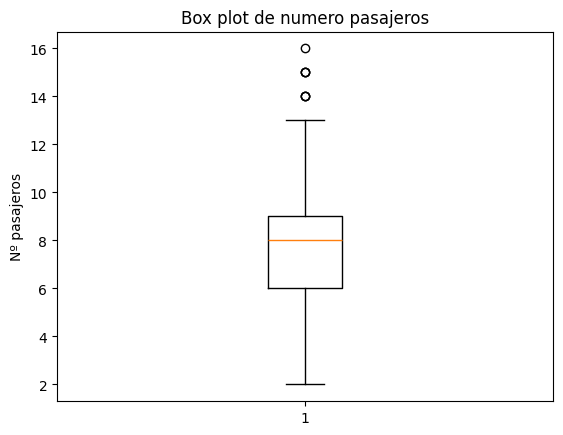

In [ ]:
#utilizar un box plot para examinar los valores atipicos del dataset
import matplotlib.pyplot as plt

plt.boxplot(df["num_pasajeros"].dropna())
plt.title("Box plot de numero pasajeros")
plt.ylabel("Nº pasajeros")
plt.show()

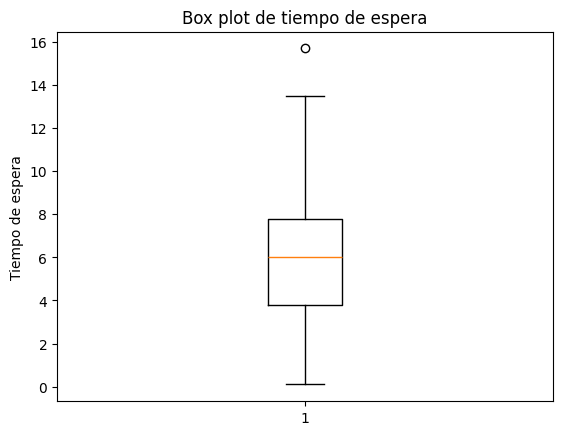

In [ ]:
plt.boxplot(df["tiempo_espera"].dropna())
plt.title("Box plot de tiempo de espera")
plt.ylabel("Tiempo de espera")
plt.show()

El boxplot nos refuerza la idea anterior de forma gráfica

# 2) Limpieza de datos

Tras los hallazgos derivados de la fase de exploración inicial, realizaremos una limpieza del dataset para garantizar la calidad y coherencia de los datos.

2.1. NULOS Y DUPLICADOS

In [ ]:
df = df.drop_duplicates() #Eliminar duplicados
print("Duplicados:\n", df.duplicated().sum()) #comprobar que se haya realizado correctamente

Duplicados:
 0


En primer lugar, se eliminan los registros duplicados completos y validamos que no permanecen duplicados en nuestro dataset.

In [ ]:
df["num_pasajeros"] = df["num_pasajeros"].fillna(
    df["num_pasajeros"].median()
)

df["tiempo_espera"] = df["tiempo_espera"].fillna(
    df["tiempo_espera"].median()
)
#imputamos con la mediana ya que tenemos outliers que distorsionarían los resultados

In [ ]:
df[["num_pasajeros", "tiempo_espera"]].isna().sum()
#comprobamos que ya no existan nulos en ambas columnas

num_pasajeros    0
tiempo_espera    0
dtype: int64

A continuación, abordamos el tratamiento de los valores nulos en las variables numéricas. Dado que la eliminación supondría la pérdida de información potencialmente relevante para el análisis, optamos por la imputación.  La imputación se realiza mediante la mediana, que es una medida robusta frente a la presencia de outliers, detectados en el análisis exploratorio.

2.2. FECHAS

En cuanto a la variable fecha_hora, se lleva a cabo su normalización y conversión al tipo de dato datetime, garantizando su correcto tratamiento.

In [ ]:
 #tenemos que quedarnos con la segunda hora porque 00.000 viene siempre por defecto
s = (df["fecha_hora"].astype(str)
     .str.replace("\u00a0", " ", regex=False)  # por si hay espacio duro
     .str.replace(r"\s+", " ", regex=True)     # colapsa espacios
     .str.strip()
)

extraido = s.str.extract(
    r"^(?P<fecha>\d{4}-\d{2}-\d{2}).*(?P<hora>\d{2}:\d{2}:\d{2})$"
)

df["fecha_hora"] = pd.to_datetime(
    extraido["fecha"] + " " + extraido["hora"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)



In [ ]:
print(df[["fecha_hora"]].head(10))

           fecha_hora
0 2024-03-11 19:00:00
1 2024-03-14 02:30:00
2 2024-03-27 01:30:00
3 2024-03-21 06:30:00
4 2024-03-23 23:00:00
5 2024-03-27 06:30:00
6 2024-03-03 01:30:00
7 2024-03-15 21:30:00
8 2024-03-22 17:30:00
9 2024-03-21 01:30:00


In [ ]:
df["fecha_hora"].dtype

dtype('<M8[ns]')

In [ ]:
df["fecha_hora"] = pd.to_datetime(df["fecha_hora"]) # convertir a su formato correcto

In [ ]:
print(df.head())

           fecha_hora    parada  num_pasajeros  tiempo_espera evento_climatico
0 2024-03-11 19:00:00  Parada_8            6.0            9.5          soleado
1 2024-03-14 02:30:00  Parada_4            7.0           10.2          soleado
2 2024-03-27 01:30:00  Parada_4            6.0            5.1         tormenta
3 2024-03-21 06:30:00  Parada_8            7.0            1.8         tormenta
4 2024-03-23 23:00:00  Parada_7            7.0            4.9         tormenta


In [ ]:
print("Minimo:\n", df["fecha_hora"].min())
print("Maximo:\n", df["fecha_hora"].max()) #Identificar minimo y maximo de fehcas para ver coherencia

Minimo:
 2024-03-01 00:00:00
Maximo:
 2024-03-30 23:30:00


Una vez hecha esta transformación observamos que el mínimo es el 1 de marzo de 2024 y el máximo el 30 de marzo de 2024. Por tanto, tenemos datos relativos al mes de marzo de los datos GPS de los autobuses.

2.3. REVISION PARADAS INEXISTENTES O INCOHERENTES

In [ ]:
df['parada'].unique() #vemos cuantos valores unicos hay en nuestras paradas

array(['Parada_8', 'Parada_4', 'Parada_7', 'Parada_1', 'Parada_9',
       'Parada_5', 'Parada_10', 'Parada_3', 'Parada_2', 'Parada_6'],
      dtype=object)

En cuanto a la variable parada, comprobamos que los registros presentan un formato homogéneo. El análisis de valores únicos confirma la existencia de 10 paradas distintas, sin inconsistencias en su nombre. También verificamos la cantidad de veces que aparece cada una de ellas, de manera que descartemos la posibilidad de que haya alguna que aparezca demasiado pocas veces. La que más aparece es la parada_5 en 67 ocasiones y la que menos la parada_6 en 31 ocasiones.

In [ ]:
df['parada'].value_counts() #Para verificar que no haya ninguna parada que aparezca demasiadas pocas veces

parada
Parada_5     65
Parada_1     61
Parada_7     56
Parada_10    55
Parada_8     50
Parada_9     49
Parada_4     46
Parada_2     45
Parada_3     42
Parada_6     31
Name: count, dtype: int64

Además, analizamos la frecuencia de aparición de cada parada para detectar posibles registros anómalos. Los resultados muestran una distribución equilibrada, sin paradas con una presencia residual que pudiera indicar errores de registro. La parada con mayor número de observaciones es Parada_5 (aparece 67 veces), mientras que la menos frecuente es Parada_6 (aparece 31 veces).

# 3) Transformación

In [ ]:
# Creacion de la variable hora
df['hora'] = df['fecha_hora'].dt.strftime('%H:%M')

# Creacion de la variable dia de la semana
df['dia_semana'] = df['fecha_hora'].dt.day_name()
# Comprobacion de que se han creado correctamente
df[['fecha_hora', 'hora', 'dia_semana']].head()


,fecha_hora,hora,dia_semana
0,2024-03-11 19:00:00,19:00,Monday
1,2024-03-14 02:30:00,02:30,Thursday
2,2024-03-27 01:30:00,01:30,Wednesday
3,2024-03-21 06:30:00,06:30,Thursday
4,2024-03-23 23:00:00,23:00,Saturday


In [ ]:
# Creacion de laboral como binario: true si es de lunes a viernes y false si no
df['laboral'] = df['dia_semana'].apply(
    lambda x: True if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else False
)

df[['fecha_hora', 'dia_semana', 'laboral']].head()


,fecha_hora,dia_semana,laboral
0,2024-03-11 19:00:00,Monday,True
1,2024-03-14 02:30:00,Thursday,True
2,2024-03-27 01:30:00,Wednesday,True
3,2024-03-21 06:30:00,Thursday,True
4,2024-03-23 23:00:00,Saturday,False


Con el objetivo de enriquecer el análisis temporal de nuestro dataset, creamos dos variables nuevas a partir de fecha_hora. En primer lugar, extraemos la hora del día en la que se registra cada observación, lo cual nos puede servir para detectar horas puntas y analizar franjas horarias.
Además, generamos las variables dia_semana y laboral con el objetivo de poder comparar el servicio de autobuses entre días laborales y fines de semana (True si es laboral, False si es fin de semana), así como estudiar el comportamiento de la demanda y tiempos de espera según el día de la semana.

In [ ]:
# Codificacion de evento_climatico mediante one-hot encoding
df = pd.get_dummies(
    df,
    columns=['evento_climatico'],
    prefix='clima'
)

In [ ]:
df.head()

,fecha_hora,parada,num_pasajeros,tiempo_espera,hora,dia_semana,laboral,clima_lluvia,clima_nublado,clima_soleado,clima_tormenta
0,2024-03-11 19:00:00,Parada_8,6.0,9.5,19:00,Monday,True,False,False,True,False
1,2024-03-14 02:30:00,Parada_4,7.0,10.2,02:30,Thursday,True,False,False,True,False
2,2024-03-27 01:30:00,Parada_4,6.0,5.1,01:30,Wednesday,True,False,False,False,True
3,2024-03-21 06:30:00,Parada_8,7.0,1.8,06:30,Thursday,True,False,False,False,True
4,2024-03-23 23:00:00,Parada_7,7.0,4.9,23:00,Saturday,False,False,False,False,True


Llevaremos a cabo la codificación de la variable evento_climatico y descartamos realizar una codificación ordinal debido a que no hay un orden inherente entre las categorías. Así, llevaremos a cabo una estrategia de one-hot encoding que representa cada categoría como una variable binaria y evita la introducción de órdenes artificiales entre los eventos climáticos. Esto resultará en una columna por cada uno de los tipos de clima y True/False si apareció ese clima en el pasado o no.

Dado que no vamos a llevar a cabo técnicas de clustering, sino que realizaremos un análisis exploratorio, comparación de métricas y visualización de resultados, no será necesario escalar la variable tiempo_espera. Mantener el tiempo de espera en su escala original permite una interpretación directa y facilita la comunicación de resultados.

# 4) Análisis exploratorio

Para responder a la pregunta de qué paradas tienen más afluencia de pasajeros, analizaremos el número medio y la mediana de pasajeros por parada, ya que nuestro dataset tiene outliers y es necesario estudiar cuál de las dos métricas da resultados más coherentes.

In [ ]:
# Aplicamos la media de pasajeros por parada ordenada de mayor a menor
media_pasajeros = (
    df
    .groupby("parada", as_index=False)
    .agg(media_pasajeros=("num_pasajeros", "mean"))
    .sort_values("media_pasajeros", ascending=False)
)

media_pasajeros

,parada,media_pasajeros
6,Parada_6,8.322581
4,Parada_4,8.108696
5,Parada_5,8.061538
0,Parada_1,8.049180
7,Parada_7,7.910714
1,Parada_10,7.890909
3,Parada_3,7.857143
2,Parada_2,7.488889
9,Parada_9,7.448980
8,Parada_8,7.160000


In [ ]:
# Aplicamos la mediana de pasajeros por parada ordenada de mayor a menor
mediana_pasajeros = (
    df
    .groupby("parada", as_index=False)
    .agg(mediana_pasajeros=("num_pasajeros", "median"))
    .sort_values("mediana_pasajeros", ascending=False)
)

mediana_pasajeros

,parada,mediana_pasajeros
0,Parada_1,8.0
1,Parada_10,8.0
2,Parada_2,8.0
3,Parada_3,8.0
4,Parada_4,8.0
5,Parada_5,8.0
6,Parada_6,8.0
7,Parada_7,8.0
9,Parada_9,8.0
8,Parada_8,7.0


El análisis de la afluencia de pasajeros por parada muestra una distribución muy homogénea entre la mayoría de las paradas, ya que salvo en la parada_8 la mediana del número de pasajeros es 8 en todas. No obstante, el análisis de la media por parada nos permite observar pequeñas diferencias que, probablemente se deban a picos de demanda puntuales, y que hacen que las patadas con mayor afluencia sean la Parada_6, la Parada_4 y la Parada_5, respectivamente.

Para responder a la pregunta de la variación del tiempo de espera según el clima, teniendo en cuenta que tenemos cuatro columnas binarias para identificarlo, reconstruiremos de forma puntual la columna categórica para poder agrupar y hacer la media y mediana segun el clima


In [ ]:
# reconstruccion de la columna clima
df["clima"] = (
    df[["clima_lluvia", "clima_nublado", "clima_soleado", "clima_tormenta"]]
    .idxmax(axis=1)
    .str.replace("clima_", "")
)
df.head()

,fecha_hora,parada,num_pasajeros,tiempo_espera,hora,dia_semana,laboral,clima_lluvia,clima_nublado,clima_soleado,clima_tormenta,clima
0,2024-03-11 19:00:00,Parada_8,6.0,9.5,19:00,Monday,True,False,False,True,False,soleado
1,2024-03-14 02:30:00,Parada_4,7.0,10.2,02:30,Thursday,True,False,False,True,False,soleado
2,2024-03-27 01:30:00,Parada_4,6.0,5.1,01:30,Wednesday,True,False,False,False,True,tormenta
3,2024-03-21 06:30:00,Parada_8,7.0,1.8,06:30,Thursday,True,False,False,False,True,tormenta
4,2024-03-23 23:00:00,Parada_7,7.0,4.9,23:00,Saturday,False,False,False,False,True,tormenta


In [ ]:
# Aplicamos la mediana, la media y el conteo de tiempo de espera por clima  ordenada de mayor a menor
tiempo_por_clima = (
    df
    .groupby("clima", as_index=False)
    .agg(
        media_tiempo_espera=("tiempo_espera", "mean"),
        mediana_tiempo_espera=("tiempo_espera", "median")
    )
    .sort_values("media_tiempo_espera", ascending=False)
)

tiempo_por_clima

,clima,media_tiempo_espera,mediana_tiempo_espera
3,tormenta,6.283333,6.05
1,nublado,6.006870,6.00
0,lluvia,5.882171,6.00
2,soleado,5.712698,6.00


Podemos observar que el comportamiento es similar en cualquiera de los escenarios, ya que la mediana es 6 minutos en todos los climas, excepto en tormenta que es de 6,05, lo cual no es una diferencia significativa. No obstante, si analizamos la media podemos ver que si las condiciones meteorológicas son peores, si aumenta el tiempo de espera, sobre todo en tormentas, lo que refuerza la idea de que existan picos puntuales en nuestro dataset y uno de los principales motivos sea la climatología.


Definimos el concepto congestión como mayor tiempo de espera, estudiaremos la media y mediana del tiempo de espera en franjas horaria de 3 horas, comenzando la primera de ellas a medianoche.

In [ ]:
# Lo primero que tendremos que hacer es convertir la hora que está en formato HH:MM en numérica
df["hora_num"] = df["hora"].str.slice(0, 2).astype(int)
df.head()

,fecha_hora,parada,num_pasajeros,tiempo_espera,hora,dia_semana,laboral,clima_lluvia,clima_nublado,clima_soleado,clima_tormenta,clima,hora_num
0,2024-03-11 19:00:00,Parada_8,6.0,9.5,19:00,Monday,True,False,False,True,False,soleado,19
1,2024-03-14 02:30:00,Parada_4,7.0,10.2,02:30,Thursday,True,False,False,True,False,soleado,2
2,2024-03-27 01:30:00,Parada_4,6.0,5.1,01:30,Wednesday,True,False,False,False,True,tormenta,1
3,2024-03-21 06:30:00,Parada_8,7.0,1.8,06:30,Thursday,True,False,False,False,True,tormenta,6
4,2024-03-23 23:00:00,Parada_7,7.0,4.9,23:00,Saturday,False,False,False,False,True,tormenta,23


In [ ]:
# Los siguiente será definir las franjas de 3 horas que vamos a examinar
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ["00-03", "03-06", "06-09", "09-12", "12-15", "15-18", "18-21", "21-24"]

#creamos la columna de franja horaria y mostramos el resultado para ver que se ha hecho de forma correcta
df["franja_horaria"] = pd.cut(
    df["hora_num"],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)
df.head()

,fecha_hora,parada,num_pasajeros,tiempo_espera,hora,dia_semana,laboral,clima_lluvia,clima_nublado,clima_soleado,clima_tormenta,clima,hora_num,franja_horaria
0,2024-03-11 19:00:00,Parada_8,6.0,9.5,19:00,Monday,True,False,False,True,False,soleado,19,18-21
1,2024-03-14 02:30:00,Parada_4,7.0,10.2,02:30,Thursday,True,False,False,True,False,soleado,2,00-03
2,2024-03-27 01:30:00,Parada_4,6.0,5.1,01:30,Wednesday,True,False,False,False,True,tormenta,1,00-03
3,2024-03-21 06:30:00,Parada_8,7.0,1.8,06:30,Thursday,True,False,False,False,True,tormenta,6,06-09
4,2024-03-23 23:00:00,Parada_7,7.0,4.9,23:00,Saturday,False,False,False,False,True,tormenta,23,21-24


In [ ]:
# estudamos la media y mediana por franja horaria
congestion_por_franja = (
    df
    .groupby("franja_horaria", as_index=False)
    .agg(
        media_tiempo_espera=("tiempo_espera", "mean"),
        mediana_tiempo_espera=("tiempo_espera", "median")
    )
    .sort_values("media_tiempo_espera", ascending=False)
)

congestion_por_franja

C:\Users\valme.lopez\AppData\Local\Temp\ipykernel_17220\319065500.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("franja_horaria", as_index=False)


,franja_horaria,media_tiempo_espera,mediana_tiempo_espera
6,18-21,6.489474,6.00
3,09-12,6.253333,6.45
5,15-18,6.237931,6.00
4,12-15,5.927869,6.00
7,21-24,5.783784,6.00
2,06-09,5.740625,6.00
1,03-06,5.740323,5.60
0,00-03,5.656250,5.95


La franja horaria con mayor media es de 18-21, no obstante la que mayor mediana presenta corresponde a 9-12.

Esta diferencia sugiere que en el intervalo de 18-21 se podrían haber producido picos puntuales que han disparado la media, pero que la franja horaria de 9 a 12 es la que presenta una mayor congestión de forma habitual y sostenida.

# 5) Visualización

Llevaremos a cabo tres visualizaciones para comunicar los hallazgos encontrados:
- Afluencia de pasajeros por parada: gráfico de barras vertical
- Variabilidad del tiempo de espera según el clima: gráfico de barras horizontal
- Congestión por franja horaria

In [ ]:
import matplotlib.pyplot as plt #tengo que importar matplotlib para poder hacer las visualizaciones

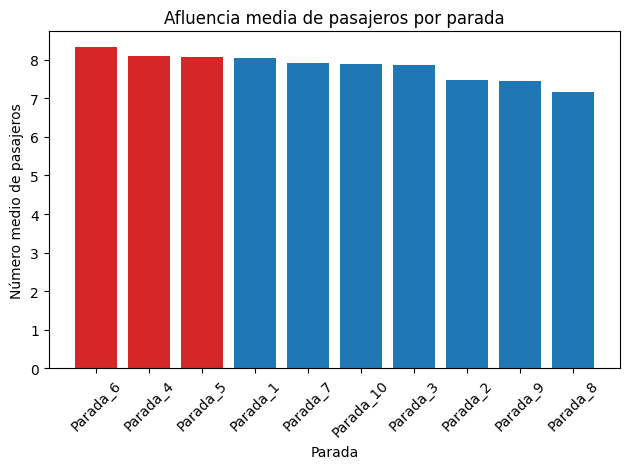

In [ ]:
# Creamos una lista de colores:
# las tres primeras paradas se resaltan en rojo
# el resto se muestran en azul
colores = ["tab:red" if i < 3 else "tab:blue"
           for i in range(len(media_pasajeros))]

# Creamos el gráfico de barras para ver la afluencia de pasajeros por parada
plt.figure()
plt.bar(
    media_pasajeros["parada"],          # eje X: paradas
    media_pasajeros["media_pasajeros"], # eje Y: media de pasajeros
    color=colores
)

# Añadimos título y etiquetas
plt.title("Afluencia media de pasajeros por parada")
plt.xlabel("Parada")
plt.ylabel("Número medio de pasajeros")

# Rotamos las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Ajustamos el layout para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show()


El gráfico muestra la afluencia media de pasajeros por parada. Se confirman nuestros cálculos estadísticos anteriores y se resaltan de un color diferente el top 3 de paradas con mayor afluencia de pasajeros.

Para llevar a cabo el estudio de la variabilidad del tiempo de espera según el clima llevaremos a cabo un gráfico de barras horizontal. También pensamos en hacer un boxplot, pero es más complejo de entender para el público no técnico y esto se trata de una visualización para comunicar hallazgos, por lo que lo idea es comunicarlo de forma sencilla y clara

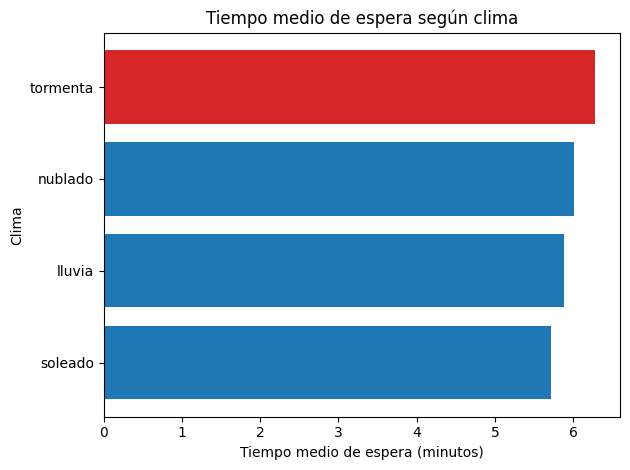

In [ ]:
colores = ["tab:red" if i == len(tiempo_por_clima) - 1 else "tab:blue"
           for i in range(len(tiempo_por_clima))] # el mayor será el que tenga el color rojo

# ordenamos los datos de mayor a menor tiempo de espera
tiempo_por_clima = tiempo_por_clima.sort_values(
    "media_tiempo_espera", ascending=True
)

# Creamos el gráfico de barras horizontal con la media del tiempo de espera calculada antes
plt.figure()
plt.barh(
    tiempo_por_clima["clima"],              # eje Y: clima
    tiempo_por_clima["media_tiempo_espera"], # eje X: media del tiempo de espera
    color = colores
)

# Añadimos título y etiquetas
plt.title("Tiempo medio de espera según clima")
plt.xlabel("Tiempo medio de espera (minutos)")
plt.ylabel("Clima")

plt.tight_layout()
plt.show()

El gráfico muestra el tiempo medio de espera por el clima. Se confirman nuestros cálculos estadísticos anteriores y se resalta la tormenta con un color rojo para destacar que es la condición climática que más influye en aumentar el tiempo medio de espera.

Llevaremos a cabo una visualización que mostrará en las barras la mediana de la congestión (tiempos de espera) por franja horaria ordenada cronológicamente. Luego en la línea mostraremos la media, así, mostramos la congestión habitual en las barras y en la línea la sensibilidad a picos puntuales

In [ ]:
# primero tenemos que ordenar las franjas
orden_franjas = [
    "00-03", "03-06", "06-09", "09-12",
    "12-15", "15-18", "18-21", "21-24"
]

# convertimos la columna en categórica ordenada
congestion_por_franja["franja_horaria"] = pd.Categorical(
    congestion_por_franja["franja_horaria"],
    categories=orden_franjas,
    ordered=True
)

# ordenamos según ese orden
congestion_por_franja = congestion_por_franja.sort_values("franja_horaria")

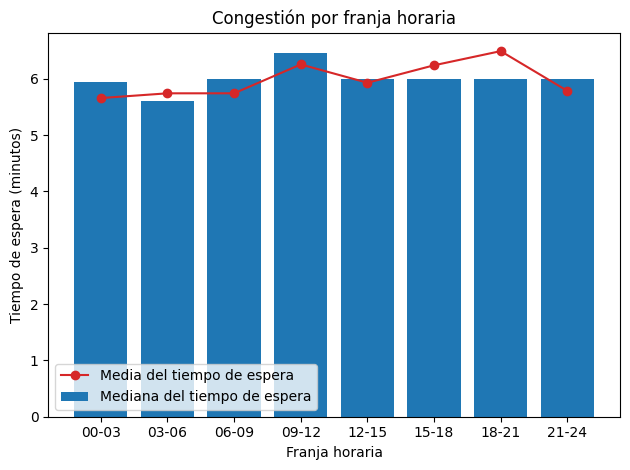

In [ ]:
plt.figure()

# en las barras ponemos la mediana del tiempo de espera
plt.bar(
    congestion_por_franja["franja_horaria"],
    congestion_por_franja["mediana_tiempo_espera"],
    label="Mediana del tiempo de espera"
)

# en la linea ponemos la media del tiempo de espera
plt.plot(
    congestion_por_franja["franja_horaria"],
    congestion_por_franja["media_tiempo_espera"],
    marker = "o",
    color="tab:red",
    label="Media del tiempo de espera"
)

plt.title("Congestión por franja horaria")
plt.xlabel("Franja horaria")
plt.ylabel("Tiempo de espera (minutos)")

plt.legend()

plt.tight_layout()
plt.show()


El gráfico muestra la congestión del sistema por franja horaria, representando la mediana del tiempo de espera mediante barras y la media mediante una línea. Así, podemos estudiar correctamente la congestión habitual (barras), así como los picos puntuales que afectan a la media visualizando la línea.

La siguiente visualización será un heatmap de franja horaria × clima para ver las interacciones de en qué horas del día el clima empeora más el servicio, por ejemplo.

In [ ]:
import seaborn as sns # impporto seaborn para hacer la visualizacion del heatmap

C:\Users\valme.lopez\AppData\Local\Temp\ipykernel_17220\2899391704.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["franja_horaria", "clima"])["tiempo_espera"]


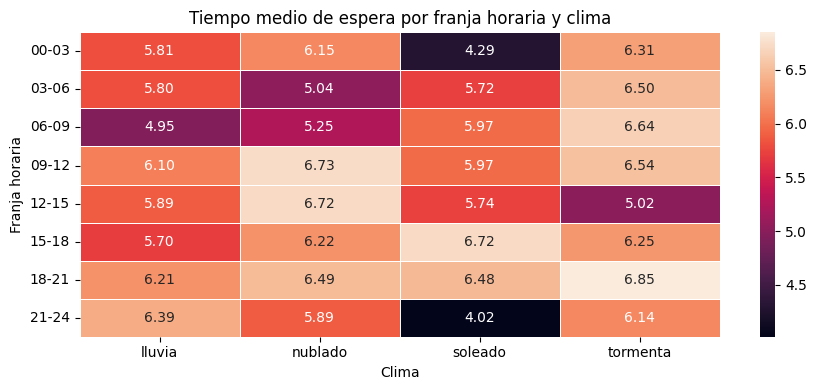

In [ ]:
# creamos una tabla con la media del tiempo de espera
heatmap_df = (
    df.groupby(["franja_horaria", "clima"])["tiempo_espera"]
      .mean()
      .unstack()  # convierte clima en columnas
)

# reordenamos las filas según el orden cronológico
heatmap_df = heatmap_df.reindex(orden_franjas)

# heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(
    heatmap_df,
    annot=True,        # muestra los valores en cada celda
    fmt=".2f",         # 2 decimales
    linewidths=0.5
)

plt.title("Tiempo medio de espera por franja horaria y clima")
plt.xlabel("Clima")
plt.ylabel("Franja horaria")
plt.tight_layout()
plt.show()

Por último, visualizamos un heatmap cruzando franja horaria y clima, donde cada celda representa el tiempo medio de espera. Así, podemos identificar interacciones entre el momento del día y la meteorología, pudiendo observar que la mayor congestión se produce en días de tormenta entre las 18 y las 21. Las franjas nocturnas son menores y más estables, por lo que el impacto del clima se intensifica, sobre todo, en las horas punta.